# Homework 3

## Ex. 5.9

The goal of this exercise is to empirically determine the asymptotic behavior of $\mathrm{cond}_2(H_n)$ as $n$ goes to $\infty$, where $H_n \in M_n(\mathbb{R})$ is the Hilbert matrix of order $n$, defined by its entries $$(H_n)_{i,j} = \dfrac{1}{i+j-1}.$$ Compute $\mathrm{cond}_2(H_5)$, $\mathrm{cond}_2(H_{10})$. What do you notice? For $n$ varying from $2$ to $10$, plot the curve $n\mapsto \ln(\mathrm{cond}_2(H_n))$. Draw conclusions about the experimental asymptotic behavior.

In [2]:
%%file Hilbert.m

function H = Hilbert(n)
    H = zeros(n);
    for i=1:n
        for j=1:n
            H(i,j) = 1/(i+j-1);
        end
    end
end

Created file 'D:\GitHub\NLA-IMA\hw3\Hilbert.m'.


In [4]:
Hilbert(5)


ans =

    1.0000    0.5000    0.3333    0.2500    0.2000
    0.5000    0.3333    0.2500    0.2000    0.1667
    0.3333    0.2500    0.2000    0.1667    0.1429
    0.2500    0.2000    0.1667    0.1429    0.1250
    0.2000    0.1667    0.1429    0.1250    0.1111




In [5]:
Hilbert(10)


ans =

    1.0000    0.5000    0.3333    0.2500    0.2000    0.1667    0.1429    0.1250    0.1111    0.1000
    0.5000    0.3333    0.2500    0.2000    0.1667    0.1429    0.1250    0.1111    0.1000    0.0909
    0.3333    0.2500    0.2000    0.1667    0.1429    0.1250    0.1111    0.1000    0.0909    0.0833
    0.2500    0.2000    0.1667    0.1429    0.1250    0.1111    0.1000    0.0909    0.0833    0.0769
    0.2000    0.1667    0.1429    0.1250    0.1111    0.1000    0.0909    0.0833    0.0769    0.0714
    0.1667    0.1429    0.1250    0.1111    0.1000    0.0909    0.0833    0.0769    0.0714    0.0667
    0.1429    0.1250    0.1111    0.1000    0.0909    0.0833    0.0769    0.0714    0.0667    0.0625
    0.1250    0.1111    0.1000    0.0909    0.0833    0.0769    0.0714    0.0667    0.0625    0.0588
    0.1111    0.1000    0.0909    0.0833    0.0769    0.0714    0.0667    0.0625    0.0588    0.0556
    0.1000    0.0909    0.0833    0.0769    0.0714    0.0667    0.0625    0.0588   

In [6]:
cond(Hilbert(5))
cond(Hilbert(10))


ans =

   4.7661e+05


ans =

   1.6025e+13




In [1]:
inv(Hilbert(5))


ans =

   1.0e+05 *

    0.0002   -0.0030    0.0105   -0.0140    0.0063
   -0.0030    0.0480   -0.1890    0.2688   -0.1260
    0.0105   -0.1890    0.7938   -1.1760    0.5670
   -0.0140    0.2688   -1.1760    1.7920   -0.8820
    0.0063   -0.1260    0.5670   -0.8820    0.4410




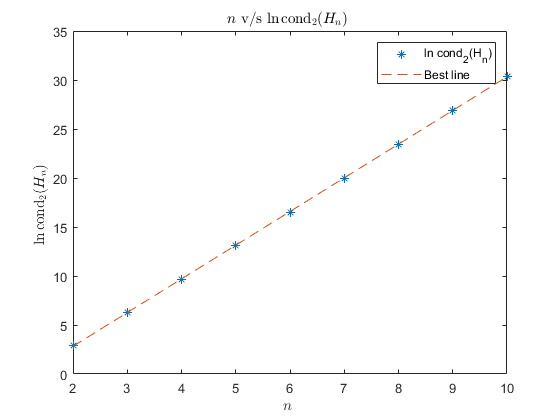

In [21]:
x = 2:10;
y = log(arrayfun(@(n) cond(Hilbert(n)),x));

fit = polyfit(x,y,1);

figure
plot(x,y,'*')
hold on
plot(x,fit(2) + fit(1).*x,'--')
hold off

title(' $n$ v/s $\ln\mathrm{cond}_2(H_n)$ ','interpreter','latex')
xlabel(' $n$ ','interpreter','latex')
ylabel(' $\ln\mathrm{cond}_2(H_n)$ ','interpreter','latex')
legend('ln cond_2(H_n)','Best line')

In [20]:
fit


fit =

    0.8145   19.0346




Notice that for small values of $n$ we found $\ln(\mathrm{cond}(H_n)) \approx C_2 n + C_1$, implying $\mathrm{cond}(H_n) \approx e^{C_1} \cdot (e^{C_2})^{n} = C_1' (C_2')^n.$

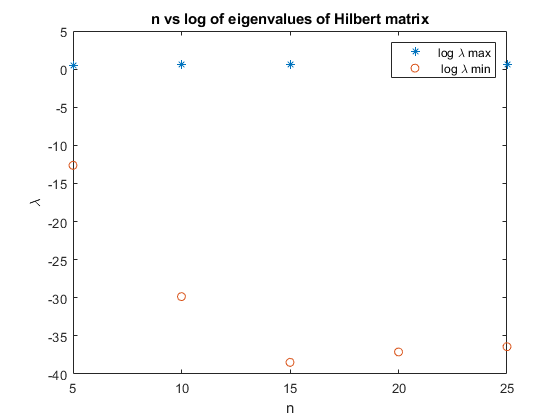

In [33]:
maxvp = zeros(5,1);
minvp = zeros(5,1);

for n=5:5:25
    maxvp(n/5) = max(eig(Hilbert(n)));
    minvp(n/5) = min(eig(Hilbert(n)));
end

figure
plot(5:5:25,log(abs(maxvp)),'*')
hold on
plot(5:5:25,log(abs(minvp)),'o')
hold off
xlabel('n')
ylabel('\lambda')
legend('log \lambda max',' log \lambda min')
title('n vs log of eigenvalues of Hilbert matrix')

In [35]:
maxvp(5)
minvp(5)


ans =

    1.9518


ans =

  -1.5296e-16




## Ex 5.12

Write a function `Lcond` that computes an approximate $2$-norm conditioning of a lower triangular matrix by *Algorithm 5.4*. Compare its result with the conditioning computed by `MATLAB`.

In [1]:
%%file NormApprox.m

function l = NormApprox(A)

    x = zeros(size(A,1),1);
    y = zeros(size(A,1),1);
    
    x(1) = 1;
    y1(1) = A(1,1);
    
    for i=2:size(A,1)
        s = 0;
        for j=1:(i-1)
            s = s + A(i,j)*x(j);
        end
        if (abs(A(i,i)+s)>abs(A(i,i)-s))
            x(i) = 1;
        else
            x(i) = -1;
        end
        y(i) = A(i,i)*x(i) + s;
    end
    l = norm(y)/sqrt(size(A,1));
    
end

Created file 'D:\GitHub\NLA-IMA\hw3\NormApprox.m'.


In [11]:
%%file NormInvApprox.m

function l = NormInvApprox(A)

    y = zeros(size(A,1),1);
    
    y(1) = 1/A(1,1);
    
    for i=2:size(A,1)
        s = 0;
        for j=1:(i-1)
            s = s + A(i,j)*y(j);
        end
        y(i) = -(sign(s)+s)/A(i,i);
    end
    l = norm(y)/sqrt(size(A,1));
    
end

Created file 'D:\GitHub\NLA-IMA\hw3\NormInvApprox.m'.


In [9]:
%%file QRGramSchmidt.m

function [Q,R] = QRGramSchmidt(A)

n = size(A,1);
m = size(A,2);
Q = zeros(n,m);
R = zeros(m,m);

for k = 1:m
    Q(:,k) = zeros(n,1);
    for j = 1:(k-1)
        R(j,k) = dot(Q(:,j),A(:,k));
        Q(:,k) = Q(:,k) + R(j,k)*Q(:,j);
    end
    Q(:,k) = A(:,k) - Q(:,k);
    if (norm(Q(:,k))~=0)
        R(k,k) = norm(Q(:,k));
        Q(:,k) = Q(:,k)./R(k,k);
    end
end

Created file 'D:\GitHub\NLA-IMA\hw3\QRGramSchmidt.m'.


In [3]:
%%file Lcond.m

function c = Lcond(A)

    %[Q,R] = QRGramSchmidt(A);
    r1 = NormApprox(R');
    r2 = NormInvApprox(R');
    c = r1*r2;

Created file 'D:\GitHub\NLA-IMA\hw3\Lcond.m'.


In [4]:
disp('* * *')
for n=5:5:50
    A = NonsingularMat(n);
    A = tril(A);
    disp('MATLAB condition number for (random) A')
    tic
    cond(A)
    toc
    disp('---')
    disp('Greedy condition number for (random) A')
    tic
    Lcond(A)
    toc
    disp('* * *')
end

* * *
MATLAB condition number for (random) A

ans =

    7.9558

Elapsed time is 0.001691 seconds.
---
Greedy condition number for (random) A

ans =

    3.0933

Elapsed time is 0.002415 seconds.
* * *
MATLAB condition number for (random) A

ans =

   61.8432

Elapsed time is 0.001286 seconds.
---
Greedy condition number for (random) A

ans =

   26.4584

Elapsed time is 0.001549 seconds.
* * *
MATLAB condition number for (random) A

ans =

   1.3245e+04

Elapsed time is 0.001800 seconds.
---
Greedy condition number for (random) A

ans =

   2.1029e+03

Elapsed time is 0.001704 seconds.
* * *
MATLAB condition number for (random) A

ans =

   5.1686e+04

Elapsed time is 0.001225 seconds.
---
Greedy condition number for (random) A

ans =

   5.6039e+03

Elapsed time is 0.002439 seconds.
* * *
MATLAB condition number for (random) A

ans =

   1.8839e+05

Elapsed time is 0.001972 seconds.
---
Greedy condition number for (random) A

ans =

   2.5490e+04

Elapsed time is 0.002400 seconds.
* 

## Ex 5.13

The goal of this exercise is to implement Hager’s algorithm for computing an approximate value of $\mathrm{cond}_1(A)$. We denote by $$S_1 = \{x\in \mathbb{R}^n : \|x\|_1 = 1\}$$ the unit sphere of $\mathbb{R}^n$ for the $1$-norm, and for $x \in \mathbb{R}^n$, we set $$f(x) = \|A^{−1}x\|_1$$ with $A \in M_n(\mathbb{R})$ a nonsingular square matrix. The $1$-norm conditioning is thus given by $$\mathrm{cond}_1(A) = \|A\|_1 \max_{x\in S_1} f(x).$$

1. Explain how to determine $\|A\|_1$.

As $\|A\|_1 = \max_{1\leq j \leq n} \sum_{i=1}^n |a_{i,j}|,$ just compute $s_j := \sum_{i=1}^n |a_{i,j}|$ and find the maximum of $s_j$.

2. Prove that $f$ attains its maximum value at one of the vectors $e_j$ of the canonical basis of $\mathbb{R}^n$.

Consider an extension of the function $f$ to $B_1 := \{ x\in \mathbb{R}^n \ : \ \|x\|_1\leq 1 \}$, as we have $$\|A^{-1}\|_1 = \sup_{x\in \mathbb{R}} \dfrac{ \|A^{-1}x\|_1 }{\|x\|_1} = \sup_{x\in B_1} \|A^{-1}x\|_1 = \sup_{x\in S} \|A^{-1}x\|_1.$$ 

We know that $f$ is convex and continuous. Moreover, $B_1$ is convex, compact and can be written as $B_1 = \mathrm{co}\{\mathrm{ext}(B_1)\},$ with $\mathrm{ext}(B_1)=\{\pm e_j\}_{j=1}^n$. Let $\hat x \in B_1$ such that maximize $f$. Suppose $\hat x \not\in \mathrm{ext}(B_1)$, then we write $\hat x$ as a nontrivial convex combination of elements in $\mathrm{ext}(B_1)$, i.e., $$\hat x = \sum_{k=1}^N \lambda_k x_k.$$

Then $$f(\hat x) \leq \sum_{k=1}^N \lambda_k f(x_k) \leq \sum_{k=1}^N \lambda_k f(\hat x) = f(\hat x).$$ Notice the above equation implies that $f$ attains its maximum in at least one $x_K$. Otherwise, we would have a contradiction , because $$\lambda_K (f(\hat x)-f(x_K)) = \sum_{\underset{k\neq K}{k=1}}^N \lambda_k f(x_k),$$ and, as $f$ is nontrivial, both sides would have different sign.

As $x_K \in \mathrm{ext}(B_1) = \{\pm e_j\}_{j=1}^n$, we are done.

3. From now on, for a given $x\in \mathbb{R}^n$, we denote by $\tilde x$ the solution of $A\tilde x = x$ and by $\breve x$ the solution of $A^\mathrm{T}\breve x = \mathrm{sign}(\tilde x)$, where $\mathrm{sign}(\tilde x)=s$ is the *sign* vector of $\tilde x$, defined by  $s_i = \mathrm{sign}(x_i)$. Prove that $f(x) = \left\langle \mathrm{sign}(\tilde x), \tilde x \right\rangle$.

This is straightforward once the notation is clear. Notice that $\tilde x = A^{-1}x$, thus $$f(x) = \|A^{-1}x\|_1 = \|\tilde x\|_1 = \sum_{i=1}^n |x_i| = \sum_{i=1}^n \mathrm{sign}(x_i)\cdot x_i =  \left\langle \mathrm{sign}(\tilde x),\tilde x \right\rangle.$$

4. Prove that for any $a \in \mathbb{R}^n$, we have $f(x) + \langle \breve x,a − x\rangle \leq f(a)$.

This could be straightforward if the notation was clearer. Recall that $\|x\|_1 = \sup_{x^*\in B_\infty} \langle x^*,x\rangle,$ where $B_\infty := \{x^*\in\mathbb{R} \ : \ \|x^*\|_\infty := \max_{1\leq i \leq n} |x_i^*| \leq 1\}$. 

Notice that $$\left\langle \breve x, a - x \right\rangle = \left\langle \breve x, A\tilde a - A\tilde x \right\rangle = \left\langle A^\mathrm{T} \breve x, \tilde a - \tilde x \right\rangle =  \left\langle \mathrm{sign}(\tilde x), \tilde a - \tilde x \right\rangle.$$

Thus proving $f(x) + \langle \breve x,a − x\rangle \leq f(a)$ is equivalent to show $$\left\langle \mathrm{sign}(\tilde x), \tilde a \right\rangle \leq \left\langle \mathrm{sign}(\tilde a), \tilde a \right\rangle.$$ This last inequality is oblivious, as $\|\mathrm{sign}(z)\|_\infty \leq 1$ for all $z\in \mathbb{R}^n$ and $\|\tilde a\|_1 = \left\langle \mathrm{sign}(\tilde a), \tilde a \right\rangle$.

**Remark:** Set $F$ the (unitary) duality map of $\ell_1^n=(\mathbb{R}^n,\|\cdot\|_1).$ Then $\tilde z = A^{-1} z$, $\mathrm{sign}(\tilde z) = F(A^{-1} z)$, and $\breve z = A^{-\mathrm{T}}F(A^{-1}z).$

**Remark:** It is better to consider the $\breve x$ as a subderivative.

5. Show that if $\breve x_j > \langle \breve x, x\rangle$ for some index $j$, then $f(e_j) > f(x)$.

Notice that $$f(x) = \left\langle \mathrm{sign}(\tilde x), \tilde x \right\rangle = \left\langle A^\mathrm{T}\breve x, \tilde x \right\rangle = \left\langle \breve x, x \right\rangle.$$

Then $$f(x) \leq f(e_j) + \langle \breve x, x-e_j\rangle = f(e_j) + \langle \breve x, x\rangle - \breve x_j < f(e_j).$$

6. Assume that $\tilde x_j \neq 0$ for all $j$.
+ Show that for $y$ close enough to $x$, we have $f(y) = f(x)+\langle \mathrm{sign}(\tilde x), A^{-1}(y−x) \rangle$.
     
Choose $y$ near enough $x$, such that each $\tilde y_j$ has the same sign that $\tilde x_j$. This can be done because $A$ is continuous, $\tilde x_j \neq 0$ for all $j$, and the underlying vector space is finite dimensional. Then $\mathrm{sign}(\tilde x) = \mathrm{sign}(\tilde y)$. As $f(x) = \langle \mathrm{sign}(\tilde x), A^{-1}x\rangle$, we obtain $$f(y) = f(x)+\langle \mathrm{sign}(\tilde x), A^{-1}(y−x) \rangle.$$

**Remark:** More explicitly, if $a,b\in\mathbb{R}$, $a\neq 0$ are given, $|b-a|<|a|$ implies $\mathrm{sign}(b)=\mathrm{sign}(a),$ as $$a-|a| < b < a + |a|.$$ Set $ \varepsilon = \min |\tilde x_j| >0.$ If $\|x-y\|_1\leq (\|A^{-1}\|_1^{-1})\varepsilon$, then $|\tilde x_j - \tilde y_j| \leq \|\tilde x - \tilde y\|_1 < \varepsilon$ as required.

+ Show that if $\|\breve x\|_\infty \leq \langle \breve x, x\rangle$, then $x$ is a local maximum of $f$ on the unit sphere $S_1$.

Set $y$ in the neighborhood described above. Then, if $y = \pm e_j$ for some $j$, then $$f(x) - f(y) = \langle \mathrm{sign}(\tilde x), A^{-1}(x-y) \rangle = \langle \breve x, x - y \rangle \geq \| \breve x \|_\infty \mp \breve x_j \geq 0.$$ 
Taking convex combinations leads to the result.

7. Deduce from the previous questions an algorithm for computing the $1$-norm conditioning of a matrix.
8. Program this algorithm (function `Cond1`). Compare its result with the conditioning computed by `MATLAB`.

In [49]:
%%file Cond1.m

function l = Cond1(A)

    r1 = Norm1(A);
    e = eye(size(A));
    b = ones(size(A,1),1)./size(A,1);
    r2 = 0;
    while 1
        x = A\b;
        if (norm(x,1) <= r2)
            l = r2*r1;
            return
        else
            r2 = norm(x,1);
        end
        y = sign(x);
        z = A'\y;
        [~,imax] = max(abs(z));
        if (abs(z(imax))<dot(z,b))
            l = r2*r1;
            return
        else
            b = e(:,imax);
        end
    end

Created file 'D:\GitHub\NLA-IMA\hw3\Cond1.m'.


In [45]:
%%file Norm1.m

function r1 = Norm1(A)

    r1 = 0;
    for i = 1:size(A,1)
        if (norm(A(:,i),1)>r1)
            r1 = norm(A(:,i));
        end
    end

Created file 'D:\GitHub\NLA-IMA\hw3\Norm1.m'.


In [51]:
disp('* * *')
for n = 5:5:25
    A = NonsingularMat(n);
    disp('Approximation of condition number')
    Cond1(A)
    disp('Condition number')
    cond(A)
    disp('* * *')
end

* * *
Approximation of condition number

ans =

   51.0211

Condition number

ans =

   73.0718

* * *
Approximation of condition number

ans =

   1.6415e+03

Condition number

ans =

   2.1197e+03

* * *
Approximation of condition number

ans =

  206.8541

Condition number

ans =

  490.1425

* * *
Approximation of condition number

ans =

   1.0541e+03

Condition number

ans =

   2.1672e+03

* * *
Approximation of condition number

ans =

  435.4944

Condition number

ans =

   1.0465e+03

* * *



## Ex 5.14

We define $n \times n$ matrices $C,D$, and $E$ by `C=NonsingularMat(n)`, `D=rand(m,n)`, `E=D*inv(C)*D’`. We also define $(n + m) \times (n + m)$ block matrices $A$ and $M$ by `A=[C D’;D zeros(m,m)]` and `M=[C zeros(n,m);zeros(m,n) E]`.

**Remark:** We set: $$A = \begin{bmatrix} C & D^* \\ D & 0 \end{bmatrix}, \ \ \ M = \begin{bmatrix} C & 0 \\ 0 & E \end{bmatrix}$$ and $E = DC^{-1}D^*.$

In [2]:
%%file NonsingularMat.m

function A = NonsingularMat(n)
    A=0;
    while det(A)==0
        A=rand(n,n);
    end
end


Created file 'D:\GitHub\NLA-IMA\hw3\NonsingularMat.m'.


1. For different values of $n$, compute the spectrum of $M^{−1}A$. What do you notice?

In [5]:
N = 1:6;
m=4
for i=1:length(N)
    n = N(i);
    C = NonsingularMat(n);
    D = rand(m,n);
    E = D*inv(C)*D';
    A = [C D';D zeros(m,m)];
    M = [C zeros(n,m);zeros(m,n) E];
    eig(inv(M)*A)
end


m =

     4



ans =

    2.1948
   -1.1948
         0
         0
         0



ans =

   0.5000 + 7.8140i
   0.5000 - 7.8140i
   0.5000 + 0.7828i
   0.5000 - 0.7828i
  -0.0000 + 0.0000i
   0.0000 + 0.0000i



ans =

   1.8008 + 0.0000i
   1.5572 + 0.0000i
   0.5000 + 1.4470i
   0.5000 - 1.4470i
  -0.5572 + 0.0000i
  -0.8008 + 0.0000i
  -0.0000 + 0.0000i


ans =

  -0.6180 + 0.0000i
  -0.6180 + 0.0000i
   1.6180 + 0.0000i
   1.6180 - 0.0000i
   1.6180 + 0.0000i
   1.6180 + 0.0000i
  -0.6180 + 0.0000i
  -0.6180 + 0.0000i


ans =

   1.0000 + 0.0000i
   1.6180 + 0.0000i
   1.6180 - 0.0000i
  -0.6180 + 0.0000i
   1.6180 + 0.0000i
   1.6180 + 0.0000i
  -0.6180 + 0.0000i
  -0.6180 - 0.0000i
  -0.6180 + 0.0000i


ans =

   1.0000 + 0.0000i
   1.0000 + 0.0000i
  -0.6180 + 0.0000i
  -0.6180 + 0.0000i
  -0.6180 + 0.0000i
  -0.6180 + 0.0000i
   1.6180 + 0.0000i
   1.6180 + 0.0000i
   1.6180 - 0.0000i
   1.6180 + 0.0000i




The spectrum is $\{\phi_+, \phi_-\}$, where $\phi_\pm=\dfrac{1\pm\sqrt{5}}{2}$. We'll assume $D$ is non singular and $n=m$. Notice that $E^{-1} = (D^*)^{-1}CD^{-1}$. Thus $$M^{-1} A = \begin{bmatrix} C^{-1} & 0 \\ 0 & E^{-1} \end{bmatrix}\begin{bmatrix} C & D^* \\ D & 0 \end{bmatrix} = \begin{bmatrix} \mathrm{Id} & C^{-1}D^* \\ E^{-1}D & 0 \end{bmatrix} = \begin{bmatrix} \mathrm{Id} & C^{-1}D^* \\ (D^*)^{-1}C & 0 \end{bmatrix}.$$

Let $\left(\lambda, \begin{bmatrix}x \\ y\end{bmatrix}\right)$ a spectral pair for $M^{-1}A$, then $$\left\lbrace\begin{array}{r l} x + C^{-1} D^*y & = \lambda x\\ (D^*)^{-1}Cx & = \lambda y.\end{array}\right.$$ As $\lambda \neq 0$, we replace the second equation in the first one, obtaining $\lambda x = (1 + \lambda^{-1})x$ and consequently, $\lambda=\phi_\pm$.

2. What is the point in replacing system $Ax = b$ by the equivalent system $M^{-1}Ax = M^{-1}b$?

Precondition the matrix so that it has an identity matrix as the main block (and probably lower condition number). 

3. We now want to give a rigorous explanation of the numerical results of the first question. We assume that $A\in M_{n+m}(\mathbb{R})$ is a non-singular matrix that admits the block structure $$A =\begin{bmatrix} C & D^*\\ D & 0 \end{bmatrix},$$ where $C \in M_n(\mathbb{R})$ and $D \in M_{m,n}(\mathbb{R})$ are such that $C$ and $DC^{−1}D^*$ are non-singular too.
+ Show that the assumption *$A$ is non-singular* implies m ≤ n.

Suppose that $m>n$, then $\mathrm{rank}(D) = \mathrm{rank}(D^*) \leq \min\{m,n\} = n < m$. Due to definition of $A$ (or by its `rref` and `rcef` matrices) and the fact $\mathrm{rank}(C) = n$, we have $\mathrm{rank}(A) \leq \mathrm{rank}(C) + \mathrm{rank}(D) < n+m.$ Thus, $A$ would be singular. 
+ Show that for $m = n$, the matrix $D$ is invertible.


We know that $E$ is non-singular. Thus $$D (C^{-1}D^*E^{-1}) = (DC^{-1}D^*)E^{-1}=\mathrm{Id}_{n\times n},$$ and $D$ would be a square matrix with a right inverse, thus non-singular. 

4. From now on, we assume $m < n$. Let $x = [x_1, x_2]^\mathrm{T}$ be the solution of the system $Ax = b = [b_1, b_2]^\mathrm{T}$. The matrix $D$ is **not assumed** to be invertible, so that we cannot first compute $x_1$ by relation $Dx_1 = b_2$, then $x_2$ by $Cx_1 + D^*x_2 = b_1$. Therefore, the relation $Dx_1 = b_2$ has to be considered as a constraint to be satisfied by the solutions $x_1, x_2$ of the system $Cx_1 + D^*x_2 = b_1$. We study the preconditioning of the system $Ax = b$ by the matrix $M^{-1}$ with $$M = \begin{bmatrix} C & 0 \\ 0 & E \end{bmatrix}.$$

+ Let $\lambda$ be an eigenvalue of $M^{−1}A$ and $[u, v]^\mathrm{T} \in \mathbb{R}^{n+m}$ a corresponding eigenvector. Prove that $(\lambda^2 − \lambda − 1)Du = 0$.
Recall that $$M^{-1} A = \begin{bmatrix} C^{-1} & 0 \\ 0 & E^{-1} \end{bmatrix}\begin{bmatrix} C & D^* \\ D & 0 \end{bmatrix} = \begin{bmatrix} \mathrm{Id} & C^{-1}D^* \\ E^{-1}D & 0 \end{bmatrix}.$$ Thus $M^{-1}A \begin{bmatrix}u\\ v\end{bmatrix} = \lambda \begin{bmatrix}u\\ v\end{bmatrix}$ can be written as $u + C^{-1}D^* v = \lambda u$ and $E^{-1} Du = \lambda v.$ If we multiply the first equation by $\lambda D$ and the second one by $E$, we obtain $\lambda Du + \lambda Ev = \lambda^2 Du$ and $Du = \lambda Ev.$ This implies $\lambda Du + Du = \lambda^2 Du$, and the claim follows.

+ Deduce the spectrum of the matrix $M^{−1}A$.

Notice that $\sigma(M^{-1}A)=\{\phi_+,1 \phi_-\}$. Because it is possible to have $Du=0$. If not, we can solve for $\lambda$. Moreover, we can verify that given $\left( \phi_+, \begin{bmatrix}u\\ v\end{bmatrix}\right)$ spectral pair of $M^{-1}A$, then $\left( \phi_-, \begin{bmatrix} u \\ (\phi_+ +1)v\end{bmatrix}\right)$ is a spectral pair of $M^{-1}A$, and vice versa.

+ Compute the 2-norm conditioning of $M^{−1}A$, assuming that it is a hermitian matrix.

This is a consequence of the above. $M^{−1}A$ hermitian implies $$\mathrm{cond}_2(M^{−1}A) = \dfrac{|\max \sigma(M^{−1}A) |}{|\min \sigma(M^{−1}A) |} = \dfrac{1+\sqrt{5}}{2}\dfrac{2}{\sqrt{5}-1} = \dfrac{3 + \sqrt{5}}{2}.$$